<a href="https://colab.research.google.com/github/ilinashah177/Coursework-Website/blob/main/Untitled5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
#Draw graphs "inline" in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
import statistics
import seaborn as sns
from IPython.display import display, Math, Latex, display_latex
import plotly.express as px
import pylab
import pandas as pd
import numpy as np
#Make the plots (graphs) a little wider by default
pylab.rcParams['figure.figsize'] = (10., 8.)
sns.set(font_scale=1.5)
sns.set_style("white")

In [13]:
from google.colab import files

# Upload the file
uploaded = files.upload()

Saving CSV File.csv to CSV File (1).csv


In [14]:
#Name of uploaded file
file_name = 'CSV File.csv'

#Read data from the required sheet
df = pd.read_csv('CSV File.csv')

df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

df

,Year,TECA,Total Population,GDP Growth (annual %),Total electricity consumption (GWh),BRI Investments in Energy Sector (USD millions),Efficiency,Electricity Trade,Production,Consumption P/C,...,Natural Gas,Nuclear,Hydro,Biofuel,Wind,Solar PV,Industry Sector,Residential,Commercial,Agriculture
0,2015,400,"217,290,883",4.2,"85,818",520.40,4.26,463,111298,0.448,...,35001,4605,34633,556,786,207,90125,160149,44575,30693
1,2016,650,"220,138,869",6.6,"90,431",893.25,4.26,496,123463,0.470,...,41426,6999,32183,712,1326,630,86436,175312,48960,33195
2,2017,1469,"223,273,967",4.4,"95,529",2296.00,4.18,556,131277,0.512,...,49203,9880,27925,988,2101,768,98884,194500,55094,36460
3,2018,1420,"226,928,892",6.2,"106,928",2062.00,4.16,487,128531,0.511,...,57436,9909,27339,891,3161,629,103536,193266,61937,35312
4,2019,1980,"230,800,899",2.5,"109,461",2907.00,4.17,514,133674,0.497,...,46020,10815,33585,565,2882,705,92548,201466,60998,35125
5,2020,701,"235,001,746",-1.3,"108,371",1600.00,4.18,498,141434,0.535,...,49472,9346,33548,711,2900,712,107834,211399,64450,36856
6,2021,4000,"239,477,801",6.5,"116,816",1658.00,3.94,463,159765,0.590,...,48667,19174,32706,826,4584,785,113759,202327,47570,36889
7,2022,1380,"243,700,667",4.8,"111,263",2716.00,3.97,463,172799,0.626,...,46978,26913,34634,876,6334,907,123040,218833,51451,39898


In [15]:
non_numeric_cols = df.select_dtypes(exclude=np.number).columns.tolist()

print("Non-numeric columns:")
non_numeric_cols


for col in non_numeric_cols:
    try:
        df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', ''), errors='coerce')
    except:
        print(f"Could not convert column '{col}' to numeric.")

df

Non-numeric columns:


,Year,TECA,Total Population,GDP Growth (annual %),Total electricity consumption (GWh),BRI Investments in Energy Sector (USD millions),Efficiency,Electricity Trade,Production,Consumption P/C,...,Natural Gas,Nuclear,Hydro,Biofuel,Wind,Solar PV,Industry Sector,Residential,Commercial,Agriculture
0,2015,400,217290883,4.2,85818,520.40,4.26,463,111298,0.448,...,35001,4605,34633,556,786,207,90125,160149,44575,30693
1,2016,650,220138869,6.6,90431,893.25,4.26,496,123463,0.470,...,41426,6999,32183,712,1326,630,86436,175312,48960,33195
2,2017,1469,223273967,4.4,95529,2296.00,4.18,556,131277,0.512,...,49203,9880,27925,988,2101,768,98884,194500,55094,36460
3,2018,1420,226928892,6.2,106928,2062.00,4.16,487,128531,0.511,...,57436,9909,27339,891,3161,629,103536,193266,61937,35312
4,2019,1980,230800899,2.5,109461,2907.00,4.17,514,133674,0.497,...,46020,10815,33585,565,2882,705,92548,201466,60998,35125
5,2020,701,235001746,-1.3,108371,1600.00,4.18,498,141434,0.535,...,49472,9346,33548,711,2900,712,107834,211399,64450,36856
6,2021,4000,239477801,6.5,116816,1658.00,3.94,463,159765,0.590,...,48667,19174,32706,826,4584,785,113759,202327,47570,36889
7,2022,1380,243700667,4.8,111263,2716.00,3.97,463,172799,0.626,...,46978,26913,34634,876,6334,907,123040,218833,51451,39898


In [16]:
#Generate summary statistics, and round everything to 2 decimal places
summary=df.describe().round(2)
summary

,Year,TECA,Total Population,GDP Growth (annual %),Total electricity consumption (GWh),BRI Investments in Energy Sector (USD millions),Efficiency,Electricity Trade,Production,Consumption P/C,...,Natural Gas,Nuclear,Hydro,Biofuel,Wind,Solar PV,Industry Sector,Residential,Commercial,Agriculture
count,8.00,8.00,8.000000e+00,8.00,8.00,8.00,8.00,8.00,8.00,8.00,...,8.00,8.00,8.00,8.00,8.00,8.00,8.00,8.00,8.00,8.00
mean,2018.50,1500.00,2.295767e+08,4.24,103077.12,1831.58,4.14,492.50,137780.12,0.52,...,46775.38,12205.12,32069.12,765.62,3009.25,667.88,102020.25,194656.50,54379.38,35553.50
std,2.45,1138.49,9.374718e+06,2.63,11046.33,835.88,0.12,32.02,19906.88,0.06,...,6527.48,7275.57,2868.63,156.32,1780.29,206.88,12533.67,19037.39,7399.71,2741.36
min,2015.00,400.00,2.172909e+08,-1.30,85818.00,520.40,3.94,463.00,111298.00,0.45,...,35001.00,4605.00,27339.00,556.00,786.00,207.00,86436.00,160149.00,44575.00,30693.00
25%,2016.75,688.25,2.224902e+08,3.78,94254.50,1423.31,4.11,463.00,127264.00,0.49,...,44871.50,8759.25,31118.50,674.50,1907.25,629.75,91942.25,188777.50,48612.50,34642.50
50%,2018.50,1400.00,2.288649e+08,4.60,107649.50,1860.00,4.18,491.50,132475.50,0.51,...,47822.50,9894.50,33127.00,769.00,2891.00,708.50,101210.00,197983.00,53272.50,35886.00
75%,2020.25,1596.75,2.361208e+08,6.28,109911.50,2401.00,4.20,502.00,146016.75,0.55,...,49270.25,12904.75,33847.00,879.75,3516.75,772.25,109315.25,204595.00,61232.75,36864.25
max,2022.00,4000.00,2.437007e+08,6.60,116816.00,2907.00,4.26,556.00,172799.00,0.63,...,57436.00,26913.00,34634.00,988.00,6334.00,907.00,123040.00,218833.00,64450.00,39898.00


In [17]:
def replace_outliers_with_nan(series, factor=1.5):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - factor * iqr
    upper_bound = q3 + factor * iqr
    return series.mask((series < lower_bound) | (series > upper_bound))

# Iterate through numeric columns and replace outliers
for col in df.select_dtypes(include=np.number).columns:
    df[col] = replace_outliers_with_nan(df[col])

df

,Year,TECA,Total Population,GDP Growth (annual %),Total electricity consumption (GWh),BRI Investments in Energy Sector (USD millions),Efficiency,Electricity Trade,Production,Consumption P/C,...,Natural Gas,Nuclear,Hydro,Biofuel,Wind,Solar PV,Industry Sector,Residential,Commercial,Agriculture
0,2015,400.0,217290883,4.2,85818,520.40,4.26,463,111298,0.448,...,NaN,4605.0,34633,556,786.0,NaN,90125,NaN,44575,NaN
1,2016,650.0,220138869,6.6,90431,893.25,4.26,496,123463,0.470,...,41426.0,6999.0,32183,712,1326.0,630.0,86436,175312.0,48960,33195.0
2,2017,1469.0,223273967,4.4,95529,2296.00,4.18,556,131277,0.512,...,49203.0,9880.0,27925,988,2101.0,768.0,98884,194500.0,55094,36460.0
3,2018,1420.0,226928892,6.2,106928,2062.00,4.16,487,128531,0.511,...,NaN,9909.0,27339,891,3161.0,629.0,103536,193266.0,61937,35312.0
4,2019,1980.0,230800899,2.5,109461,2907.00,4.17,514,133674,0.497,...,46020.0,10815.0,33585,565,2882.0,705.0,92548,201466.0,60998,35125.0
5,2020,701.0,235001746,NaN,108371,1600.00,4.18,498,141434,0.535,...,49472.0,9346.0,33548,711,2900.0,712.0,107834,211399.0,64450,36856.0
6,2021,NaN,239477801,6.5,116816,1658.00,NaN,463,159765,0.590,...,48667.0,NaN,32706,826,4584.0,785.0,113759,202327.0,47570,36889.0
7,2022,1380.0,243700667,4.8,111263,2716.00,NaN,463,172799,0.626,...,46978.0,NaN,34634,876,NaN,907.0,123040,218833.0,51451,39898.0


In [18]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, list_var_not_to_remove=None, thresh=5):
    # Initialize df with data_cleaned to ensure it's defined
    df = df.copy()

    # Drop rows with any missing values
    df = df.dropna()

    while True:
        #Adding a constant item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i)
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        #Drop the const as const should not be removed
        vif_df = vif_df.drop('const')

        #Drop the variables that should not be removed
        if list_var_not_to_remove is not None:
            vif_df = vif_df.drop(list_var_not_to_remove)

        print('Max VIF:', vif_df.VIF.max())

        #If the largest VIF is above the thresh, remove a variable with the largest VIF
        if vif_df.VIF.max() > thresh:
            #If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            #No VIF is above threshold, exit the loop
            break

    return df

In [19]:
predictor_vars=['GDP Growth (annual %)', 'Total Population', 'BRI Investments in Energy Sector (USD millions)']

vif = drop_column_using_vif_(df[predictor_vars], thresh=5)
print("The columns remaining after VIF selection are:")
print(vif.columns)

Max VIF: 2.7100503107458835
The columns remaining after VIF selection are:
Index(['GDP Growth (annual %)', 'Total Population',
       'BRI Investments in Energy Sector (USD millions)'],
      dtype='object')


Text(0.5, 1.0, 'Correlation Matrix')

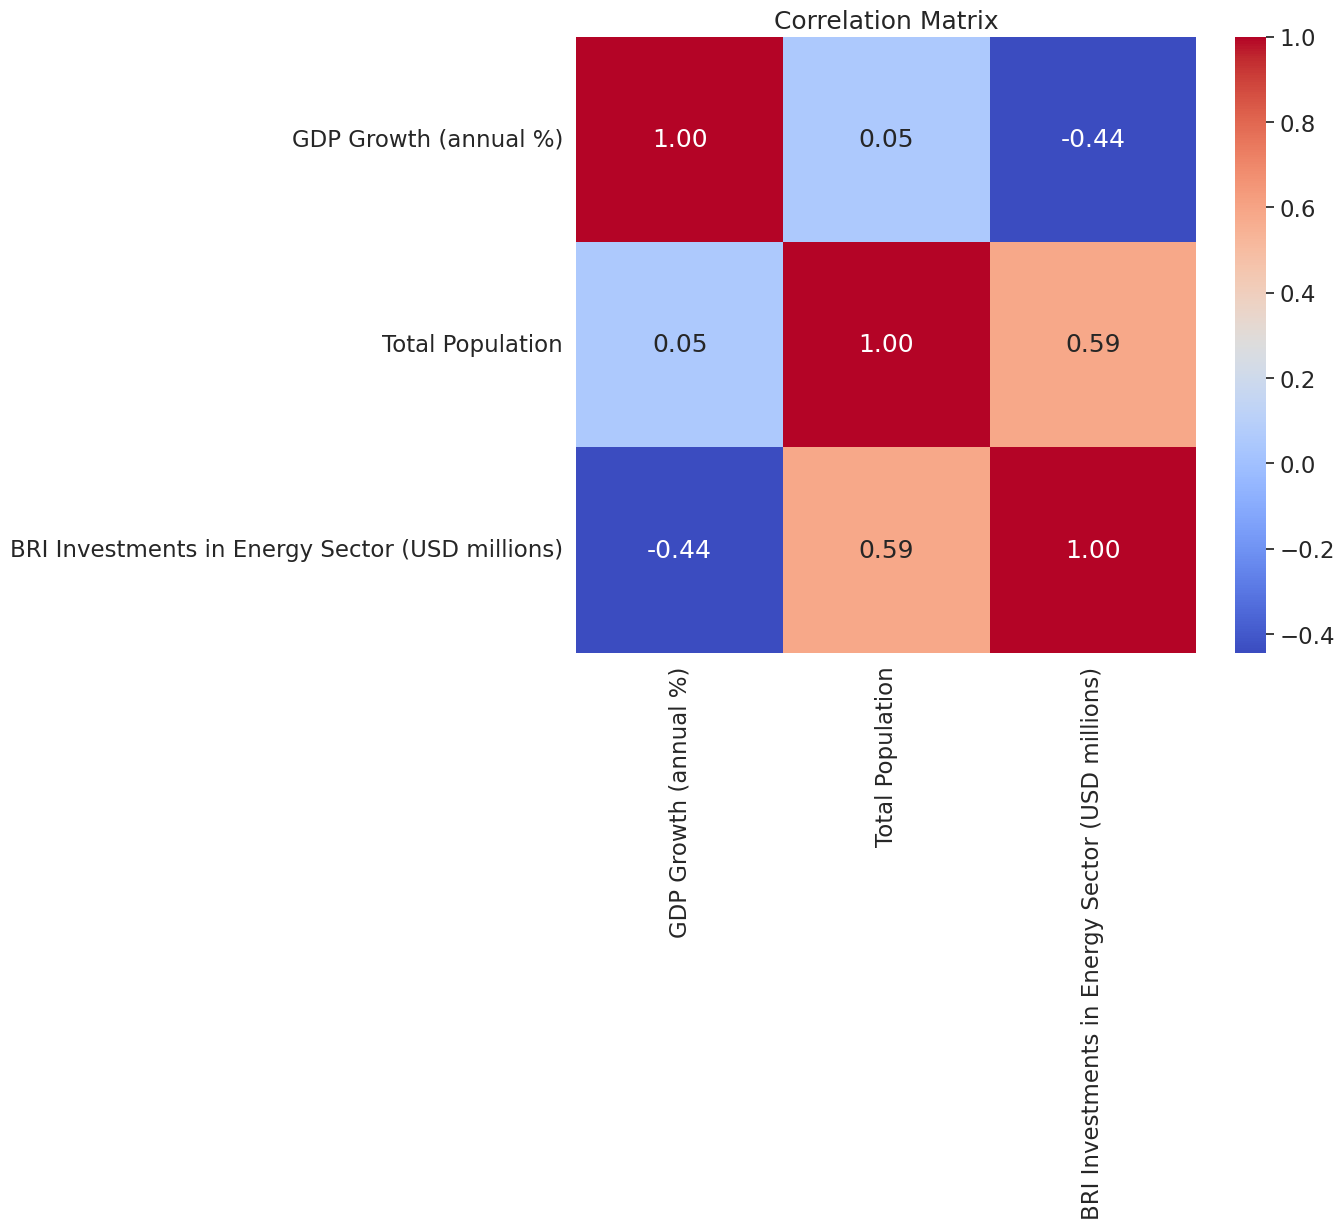

In [20]:
sns.heatmap(df[['GDP Growth (annual %)', 'Total Population', 'BRI Investments in Energy Sector (USD millions)']].corr(), # plot a correlation matrix
            annot=True, # show the correlation values on the plot
            fmt=".2f", # set the format of the correlation values to be two decimal places
            cmap='coolwarm') # set the color palette to be coolwarm (blue for negative correlations, red for positive correlations)

plt.title('Correlation Matrix') # add a title

In [31]:
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col

model2_sm = ols('Commercial ~ Q("GDP Growth (annual %)") + Q("Total Population") + Q("BRI Investments in Energy Sector (USD millions)")', data=df).fit()
print(model2_sm.summary())


                            OLS Regression Results                            
Dep. Variable:             Commercial   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     4.820
Date:                Sat, 18 Jan 2025   Prob (F-statistic):              0.114
Time:                        15:42:52   Log-Likelihood:                -64.872
No. Observations:                   7   AIC:                             137.7
Df Residuals:                       3   BIC:                             137.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
